## Quora Question Pair Similarity

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import distance

In [ ]:
df=pd.read_csv("train.csv")

In [ ]:
df.shape

(404290, 6)

In [ ]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [ ]:
df.qid1.value_counts()  # Questions are repeating some times

8461     50
14110    48
20628    47
1749     47
25984    47
         ..
53316     1
45128     1
41034     1
43083     1
2047      1
Name: qid1, Length: 290654, dtype: int64

In [ ]:
df.drop("id",axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   qid1          404290 non-null  int64 
 1   qid2          404290 non-null  int64 
 2   question1     404289 non-null  object
 3   question2     404288 non-null  object
 4   is_duplicate  404290 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 15.4+ MB


In [ ]:
df.isnull().sum()      # Checking null values

qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.dropna(inplace=True)

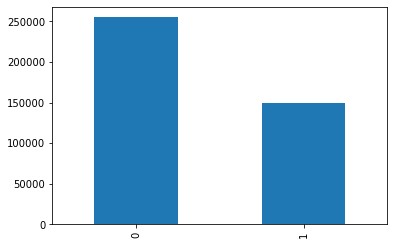

In [ ]:
df.is_duplicate.value_counts().plot.bar()

In [ ]:
print("Question Pairs which are not Similar : {}".format((df.is_duplicate.value_counts()[0]/df.shape[0])*100))
print("Question Pairs which are Similar : {}".format((df.is_duplicate.value_counts()[1]/df.shape[0])*100))

Question Pairs which are not Similar : 63.0799407351708
Question Pairs which are Similar : 36.92005926482919


## Number of occurrences of each question

Maximum number of times a single question is repeated: 157



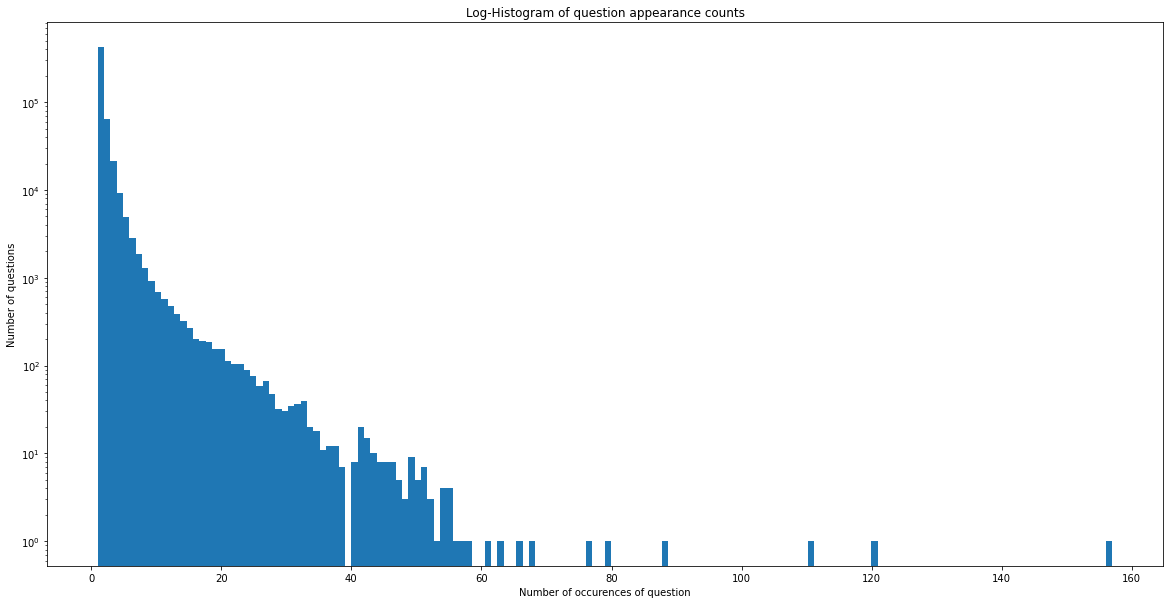

In [ ]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [ ]:
qid1_set=set(df.qid1.unique())
qid2_set=set(df.qid2.unique())
union_qid12=qid1_set.union(qid2_set)
print("Total Number of Unique Questions are : {}".format(len(union_qid12)))

Total Number of Unique Questions are : 537929


## No of Characters in Q1 and Q2

In [ ]:
df['q1clen']=df.question1.apply(lambda x:len(x))

In [ ]:
df['q2clen']=df.question2.apply(lambda x:len(x))

C:\Users\Admin\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


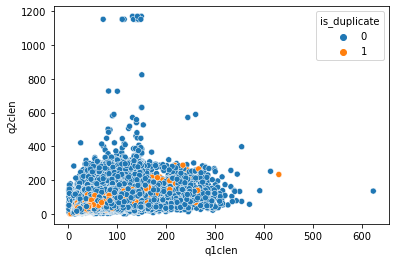

In [ ]:
sns.scatterplot('q1clen','q2clen',hue='is_duplicate',data=df)

## No of Words in Q1 and Q2

In [ ]:
df['q1wlen']=df.question1.apply(lambda x: len(x.split()))
df['q2wlen']=df.question2.apply(lambda x: len(x.split()))

C:\Users\Admin\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


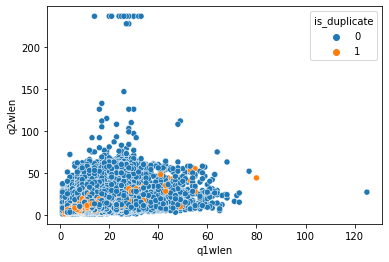

In [ ]:
sns.scatterplot('q1wlen','q2wlen',hue='is_duplicate',data=df)

## No of Common Words in Q1 and Q2

In [ ]:
def common_words(row):
    w1=set(row['question1'].lower().split())
    w2=set(row['question2'].lower().split())
    intersect=w1.intersection(w2)
    return len(intersect)

In [ ]:
df['cwc']=df.apply(common_words,axis=1)       #CWC (Common Word Count)

In [ ]:
df.head()

qid1  qid2                                          question1  \
0     1     2  What is the step by step guide to invest in sh...   
1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2     5     6  How can I increase the speed of my internet co...   
3     7     8  Why am I mentally very lonely? How can I solve...   
4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  q1clen  \
0  What is the step by step guide to invest in sh...             0      66   
1  What would happen if the Indian government sto...             0      51   
2  How can Internet speed be increased by hacking...             0      73   
3  Find the remainder when [math]23^{24}[/math] i...             0      50   
4            Which fish would survive in salt water?             0      76   

   q2clen  q1wlen  q2wlen  cwc  
0      57      14      12   10  
1      88       8      13    4  
2      59      14      10    4  
3      65      11       9    0  
4      39      13       7    2

## Common Word Share
cws= Common words in w1 and w2/ (words in w1 + words in w2)

In [ ]:
def common_word_share(row):
    return row['cwc']/(row['q1wlen']+row['q2wlen'])

In [ ]:
df['cws']=df.apply(common_word_share,axis=1)

In [ ]:
df.head()

qid1  qid2                                          question1  \
0     1     2  What is the step by step guide to invest in sh...   
1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2     5     6  How can I increase the speed of my internet co...   
3     7     8  Why am I mentally very lonely? How can I solve...   
4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  q1clen  \
0  What is the step by step guide to invest in sh...             0      66   
1  What would happen if the Indian government sto...             0      51   
2  How can Internet speed be increased by hacking...             0      73   
3  Find the remainder when [math]23^{24}[/math] i...             0      50   
4            Which fish would survive in salt water?             0      76   

   q2clen  q1wlen  q2wlen  cwc       cws  
0      57      14      12   10  0.384615  
1      88       8      13    4  0.190476  
2      59      14      10    4  0.166667  
3      65      11       9    0  0.000000  
4      39      13       7    2  0.100000

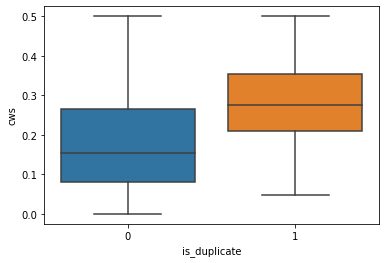

In [ ]:
sns.boxplot(x='is_duplicate',y='cws',data=df)

###### Similar questions tends to have higher common word share.

## Difference of Length of Question (abs(len(q1)-len(q2)))

In [ ]:
def difference(row):
    return abs(row.q1clen-row.q2clen)
df['diffclen']=df.apply(difference,axis=1)

In [ ]:
df.head()

qid1  qid2                                          question1  \
0     1     2  What is the step by step guide to invest in sh...   
1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2     5     6  How can I increase the speed of my internet co...   
3     7     8  Why am I mentally very lonely? How can I solve...   
4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  q1clen  \
0  What is the step by step guide to invest in sh...             0      66   
1  What would happen if the Indian government sto...             0      51   
2  How can Internet speed be increased by hacking...             0      73   
3  Find the remainder when [math]23^{24}[/math] i...             0      50   
4            Which fish would survive in salt water?             0      76   

   q2clen  q1wlen  q2wlen  cwc       cws  diffclen  
0      57      14      12   10  0.384615         9  
1      88       8      13    4  0.190476        37  
2      59      14      10    4  0.166667        14  
3      65      11       9    0  0.000000        15  
4      39      13       7    2  0.100000        37

(0.0, 200.0)

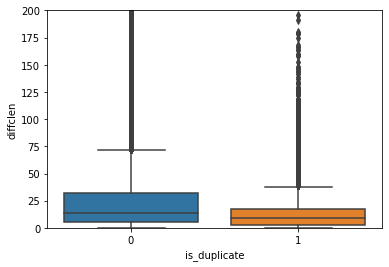

In [ ]:
sns.boxplot(x="is_duplicate",y="diffclen",data=df)
plt.ylim(0,200)

###### From the boxplot difference of characters have many outliers ( We cant get any useful insights by using this feature, but for now we are not dropping it).

In [ ]:
def difference_word(row):
    return abs(row.q1wlen-row.q2wlen)

df['diffwlen']=df.apply(difference_word,axis=1)

In [ ]:
df.head()

qid1  qid2                                          question1  \
0     1     2  What is the step by step guide to invest in sh...   
1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2     5     6  How can I increase the speed of my internet co...   
3     7     8  Why am I mentally very lonely? How can I solve...   
4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  q1clen  \
0  What is the step by step guide to invest in sh...             0      66   
1  What would happen if the Indian government sto...             0      51   
2  How can Internet speed be increased by hacking...             0      73   
3  Find the remainder when [math]23^{24}[/math] i...             0      50   
4            Which fish would survive in salt water?             0      76   

   q2clen  q1wlen  q2wlen  cwc       cws  diffclen  diffwlen  
0      57      14      12   10  0.384615         9         2  
1      88       8      13    4  0.190476        37         5  
2      59      14      10    4  0.166667        14         4  
3      65      11       9    0  0.000000        15         2  
4      39      13       7    2  0.100000        37         6

C:\Users\Admin\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


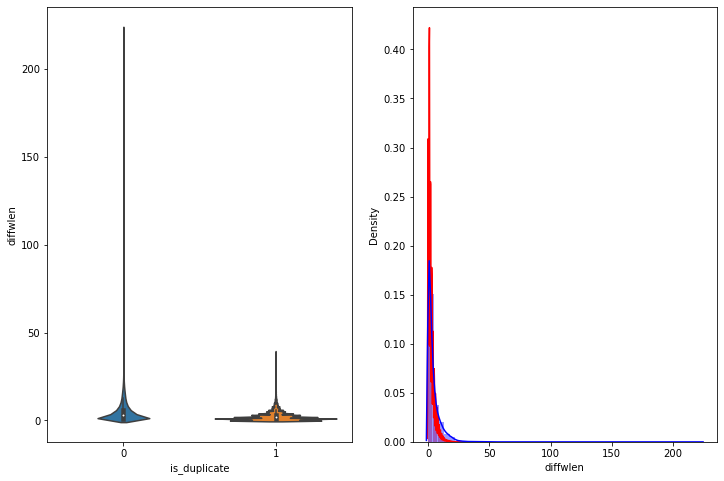

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'diffwlen', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['diffwlen'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['diffwlen'][0:] , label = "0" , color = 'blue' )
plt.show()

## Preprocessing

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import re

In [ ]:
stop_words=stopwords.words('english')

def preprocess(text):
    text=str(text).lower()
    text.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    text = re.sub(r"([0-9]+)000000", r"\1m", text)
    text = re.sub(r"([0-9]+)000", r"\1k", text)
    
    stemmer=PorterStemmer()
    words=text.split()
    stemmed_words=[]
    for word in words:
        word=stemmer.stem(word)
        stemmed_words.append(word)
    
    text=' '.join(stemmed_words)
    
    soup=BeautifulSoup(text)
    text=soup.get_text()
    
    return text

Features:
- __cwc_min__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ :  Check if First word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
      
- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


In [ ]:
def extract_features(q1, q2):
    features=[0]*8
    SAFE_DIV = 0.0001 
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return features 
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return features

def longest_substr_ratio(a, b):
    strs=list(distance.lcsubstrings(a,b))
    if len(strs)==0:
        return 0
    else:
        return len(strs[0])/(min(len(a),len(b))+1)

def helper(df):
    df["question1"] = df["question1"].apply(preprocess)
    df["question2"] = df["question2"].apply(preprocess)
    
    token_features=df.apply(lambda x : extract_features(x['question1'],x['question2']),axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    
    df["longest_substr_ratio"]  = df.apply(lambda x: longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df
    

In [ ]:
df=helper(df)
df.head()

C:\Users\Admin\miniconda3\lib\site-packages\bs4\__init__.py:333: MarkupResemblesLocatorWarning: "." looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  MarkupResemblesLocatorWarning


qid1  qid2                                          question1  \
0     1     2  what is the step by step guid to invest in sha...   
1     3     4  what is the stori of kohinoor (koh-i-noor) dia...   
2     5     6  how can i increas the speed of my internet con...   
3     7     8    whi am i mental veri lonely? how can i solv it?   
4     9    10  which one dissolv in water quikli sugar, salt,...   

                                           question2  is_duplicate  q1clen  \
0  what is the step by step guid to invest in sha...             0      66   
1  what would happen if the indian govern stole t...             0      51   
2  how can internet speed be increas by hack thro...             0      73   
3  find the remaind when [math]23^{24}[/math] is ...             0      50   
4             which fish would surviv in salt water?             0      76   

   q2clen  q1wlen  q2wlen  cwc  ...  diffwlen   cwc_min   cwc_max   csc_min  \
0      57      14      12   10  ...         2  0.799984  0.666656  0.999983   
1      88       8      13    4  ...         5  0.499988  0.222220  0.666644   
2      59      14      10    4  ...         4  0.599988  0.499992  0.399992   
3      65      11       9    0  ...         2  0.000000  0.000000  0.000000   
4      39      13       7    2  ...         6  0.000000  0.000000  0.999950   

    csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
0  0.999983  0.833326  0.714281             0              1   
1  0.499988  0.499994  0.307690             0              1   
2  0.249997  0.499995  0.357140             0              1   
3  0.000000  0.000000  0.000000             0              0   
4  0.666644  0.285710  0.153845             0              1   

   longest_substr_ratio  
0              0.964912  
1              0.576923  
2              0.181818  
3              0.041667  
4              0.153846  

[5 rows x 22 columns]

## Common Word Ratio
Suppose length of q1 is small and q2 is very large in that case if q1 is the subset of q2 then we can recommend answers of q2 to user. (How much percentage of common words).

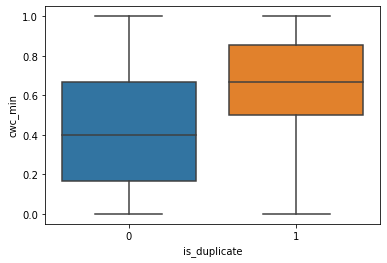

In [ ]:
sns.boxplot(x="is_duplicate",y="cwc_min",data=df)

###### Observation : Similar questions tends to have higher CWC_min as compared to dissimilar questions

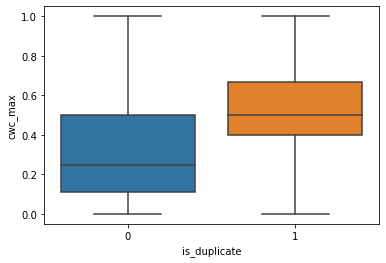

In [ ]:
sns.boxplot(x="is_duplicate",y="cwc_max",data=df)

### Common Stop word Count

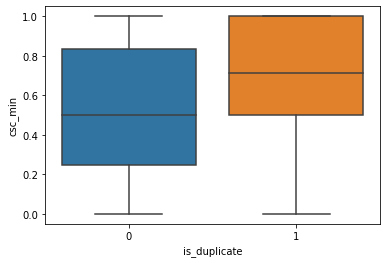

In [ ]:
sns.boxplot(x="is_duplicate",y="csc_min",data=df)

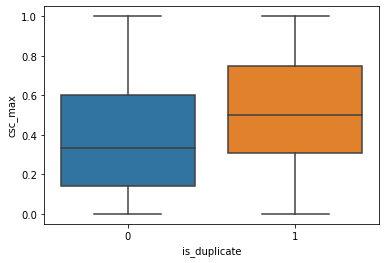

In [ ]:
sns.boxplot(x="is_duplicate",y="csc_max",data=df)

###### From the box plots of common stopwords and common words , common words feature is more useful as compared to common stopwords

### Common token count ratio

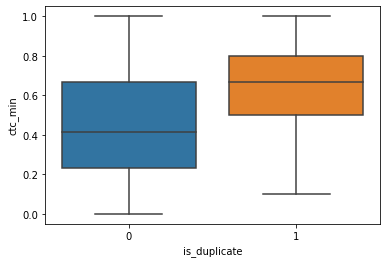

In [ ]:
sns.boxplot(x="is_duplicate",y="ctc_min",data=df)

#### Have same First Word or same Last word ?

C:\Users\Admin\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


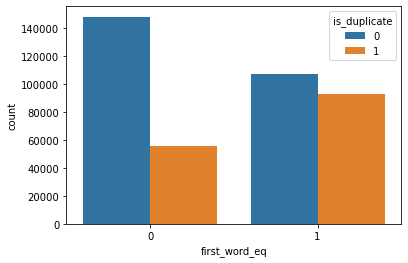

In [ ]:
sns.countplot("first_word_eq",data=df,hue="is_duplicate")

C:\Users\Admin\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


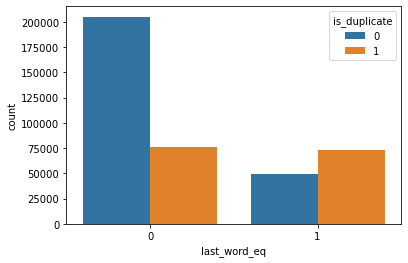

In [ ]:
sns.countplot("last_word_eq",data=df,hue="is_duplicate")

###### In last word equivalent features the no of is_duplicate=1 having same last word is greater than the words having different last word.

### Longest Substr Ratio

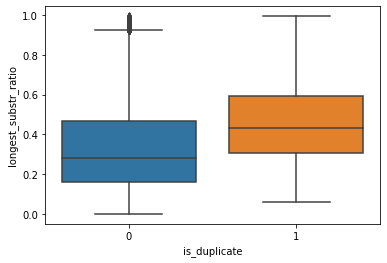

In [ ]:
sns.boxplot(y="longest_substr_ratio",x='is_duplicate',data=df)

###### Observation : Similar questions tends to have higher longest_substr_ratio  as compared to dissimilar questions

### Plotting Word Clouds

In [ ]:
df_duplicate=df[df.is_duplicate==1]
df_nonduplicate=df[df.is_duplicate==0]

list_sentences_duplicate=[]
list_sentences_nonduplicate=[]

def add_sentence_duplicate(row):
    list_sentences_duplicate.append(row.question1)
    list_sentences_duplicate.append(row.question2)
    return row

def add_sentence_nonduplicate(row):
    list_sentences_nonduplicate.append(row.question1)
    list_sentences_nonduplicate.append(row.question2)
    return row

df_duplicate=df_duplicate.apply(add_sentence_duplicate,axis=1)
df_nonduplicate=df_nonduplicate.apply(add_sentence_nonduplicate,axis=1)

In [ ]:
dup_text=' '.join(list_sentences_duplicate)
non_dup_text=' '.join(list_sentences_nonduplicate)

### Word Cloud for Duplicate Question (i.e. is_duplicate = 1)

Word Cloud for Duplicate Question pairs


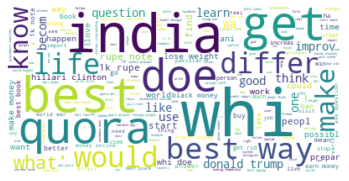

In [ ]:
wc=WordCloud(background_color='white',stopwords=stopwords)
wc.generate(dup_text)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Cloud for Non-Duplicate Question (i.e. is_duplicate = 0)

Word Cloud for Non-Duplicate Question pairs


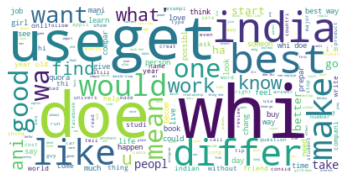

In [ ]:
wc=WordCloud(background_color='white',stopwords=stopwords)
wc.generate(non_dup_text)
print ("Word Cloud for Non-Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

###### From word clouds we can figure out that words (which, best, use, differ) occurs more often in both.

### Bivariate (Pair - plots)

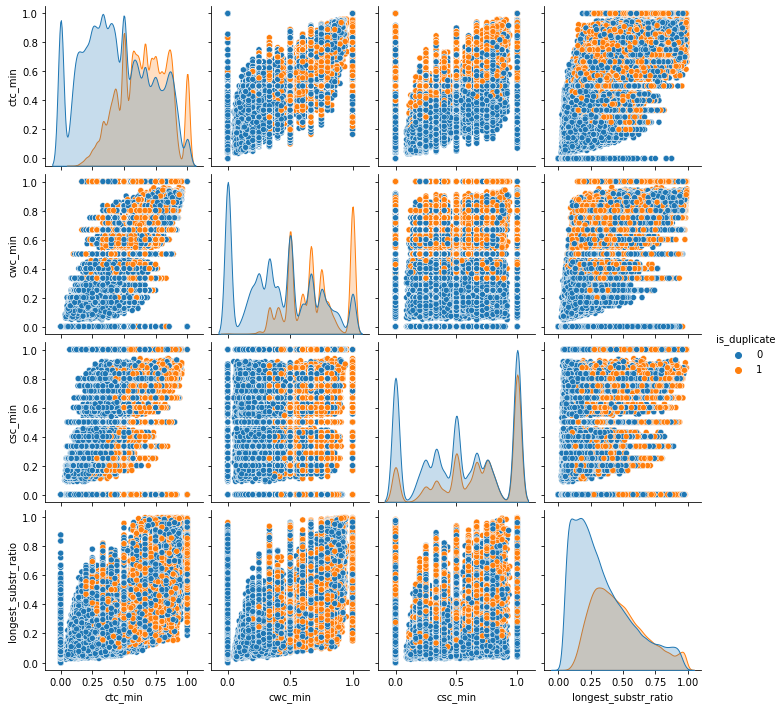

In [ ]:
sns.pairplot(hue='is_duplicate',data=df[['ctc_min', 'cwc_min', 'csc_min','longest_substr_ratio','is_duplicate']])

### TSNE (Dimensionality Reduction)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(perplexity=30)

In [ ]:
df_viz=df.drop(['question1','question2','qid1','qid2'],axis=1)
df_viz=tsne.fit_transform(df_viz)
df_viz
#sns.scatterplot(x=)

### Featurizing text data with tfidf weighted word-vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [ ]:
#Merging Questions
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

After finding TF-IDF scores, we convert each question to a weighted average of word2vec vectors by using a pre-trained GLOVE model


#### Glove (Global Vectors word embedding)

In [ ]:
nlp=spacy.load('en_core_web_sm')   # Loading spacy glove model

In [ ]:
vecs1=[]      # Array to store word2vec for each question1

for qu1 in list(df['question1']):
    doc1 = nlp(qu1) 
    
    mean_vec1 = np.zeros([len(doc1[0].vector)])
    
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch Idf score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
        
    mean_vec1 = mean_vec1/(len(doc1))
    vecs1.append(mean_vec1)

In [ ]:
vecs2=[]      # Array to store word2vec for each question2

for qu2 in list(df['question2']):
    doc2 = nlp(qu2) 
    
    mean_vec2 = np.zeros([len(doc2[0].vector)])
    
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch Idf score
        try:
            idf = word2tfidf[str(word2)]
        except:
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
        
    mean_vec2 = mean_vec2/(len(doc2))
    vecs2.append(mean_vec2)

In [ ]:
q1_feature=pd.DataFrame(vecs1)
q2_feature=pd.DataFrame(vecs2)

In [ ]:
# Making columns equals to 0x,1x,2x....
q1_col=[]
for i in range(96):
    q1_col.append(str(i)+"x")
q1_feature.columns=q1_col
q1_feature.head()

0x        1x        2x        3x        4x        5x        6x  \
0  3.616897  1.194582  1.474849 -1.295935  0.172754  1.324120 -0.704323   
1  0.623288  3.906232  0.450954 -1.429640 -1.299518  0.130135 -1.183584   
2  1.894236  0.108725 -0.158247 -0.675031  0.071197  0.178026 -0.643657   
3 -0.788045 -0.130802  0.336192 -0.041254 -1.250256  1.872206 -1.414398   
4  6.123230  5.163407  0.009085  0.145490 -2.511592 -1.293356 -3.631408   

         7x        8x        9x  ...       86x       87x       88x       89x  \
0  0.063668  2.414092 -2.599117  ... -1.331471 -1.717725 -1.505967 -0.939947   
1 -0.216364  1.159399 -1.059757  ...  0.203972 -1.552898 -2.964534 -2.513873   
2 -0.163535  0.441356 -2.556101  ... -0.188179 -0.158260 -1.197454 -1.259964   
3 -1.316885  1.532934 -1.265765  ... -1.185006 -0.608836 -1.897632 -1.364885   
4  1.047961  1.538338 -1.159693  ... -0.970620 -3.496155 -4.771817 -0.849114   

        90x       91x       92x       93x       94x       95x  
0 -0.461555 -0.287075  0.066247 -0.610135 -0.076991 -0.193343  
1  0.209702  1.541248  3.758497 -3.107528  0.342134 -1.273410  
2  0.380909 -0.097506 -0.121414  0.485932 -0.416593 -1.259160  
3 -1.468404  0.484680  1.293103 -2.083394  1.290471 -1.793514  
4 -4.903643  0.671398  4.532371 -4.462833  1.830648  0.909748  

[5 rows x 96 columns]

In [ ]:
# Making columns equals to 0y,1y,2y....
q2_col=[]
for i in range(96):
    q2_col.append(str(i)+"y")
q2_feature.columns=q2_col
q2_feature.head()

0y        1y        2y        3y        4y        5y        6y  \
0  3.535171  1.423270  1.279655 -1.193349 -0.175855  1.150497 -0.536241   
1 -0.584427  2.216884 -0.336287 -0.733933 -1.493534  0.451785 -0.537393   
2  4.317416 -0.296888  1.561946 -1.672288 -0.836081 -0.313332 -0.423908   
3 -1.675216  0.709823 -0.066162 -0.110500 -1.059549  1.247959 -1.160672   
4  1.528258  3.269958 -0.436866 -1.038430 -1.360954  2.292945 -0.605965   

         7y        8y        9y  ...       86y       87y       88y       89y  \
0  0.403306  1.898686 -2.585980  ... -1.411024 -2.085109 -1.512785 -1.063478   
1 -0.369622  1.357600 -1.046811  ... -1.684924 -1.571527 -2.269335 -1.191502   
2 -0.418550  3.140190 -3.334331  ... -3.446802 -1.502833 -0.566474 -1.036353   
3 -1.829363  1.998848 -1.515321  ...  0.314866 -1.150192  0.004391  0.454752   
4  3.403521 -0.079935 -2.191028  ... -1.180085 -2.546785 -1.847626 -2.138872   

        90y       91y       92y       93y       94y       95y  
0 -0.486351 -0.576142 -0.535821 -0.530244 -0.188530 -0.647943  
1 -0.119208  0.923374  1.759085 -1.971907  0.903411 -1.793149  
2 -0.572939  1.087914 -0.145712 -1.748961 -1.883359 -0.775791  
3  0.319057 -0.047474  0.667810  0.309844 -1.587851 -0.578349  
4 -2.514129 -0.437248 -1.709147  1.417459 -0.014474 -1.617528  

[5 rows x 96 columns]

In [ ]:
df.head(2)

qid1  qid2                                          question1  \
0     1     2  what is the step by step guid to invest in sha...   
1     3     4  what is the stori of kohinoor (koh-i-noor) dia...   

                                           question2  is_duplicate  q1clen  \
0  what is the step by step guid to invest in sha...             0      66   
1  what would happen if the indian govern stole t...             0      51   

   q2clen  q1wlen  q2wlen  cwc  ...  diffwlen   cwc_min   cwc_max   csc_min  \
0      57      14      12   10  ...         2  0.799984  0.666656  0.999983   
1      88       8      13    4  ...         5  0.499988  0.222220  0.666644   

    csc_max   ctc_min   ctc_max  last_word_eq  first_word_eq  \
0  0.999983  0.833326  0.714281             0              1   
1  0.499988  0.499994  0.307690             0              1   

   longest_substr_ratio  
0              0.964912  
1              0.576923  

[2 rows x 22 columns]

In [ ]:
final_df=pd.concat([df,q1_feature,q2_feature],axis=1)

In [ ]:
final_df.head(2)

qid1  qid2                                          question1  \
0   1.0   2.0  what is the step by step guid to invest in sha...   
1   3.0   4.0  what is the stori of kohinoor (koh-i-noor) dia...   

                                           question2  is_duplicate  q1clen  \
0  what is the step by step guid to invest in sha...           0.0    66.0   
1  what would happen if the indian govern stole t...           0.0    51.0   

   q2clen  q1wlen  q2wlen   cwc  ...       86y       87y       88y       89y  \
0    57.0    14.0    12.0  10.0  ... -1.411024 -2.085109 -1.512785 -1.063478   
1    88.0     8.0    13.0   4.0  ... -1.684924 -1.571527 -2.269335 -1.191502   

        90y       91y       92y       93y       94y       95y  
0 -0.486351 -0.576142 -0.535821 -0.530244 -0.188530 -0.647943  
1 -0.119208  0.923374  1.759085 -1.971907  0.903411 -1.793149  

[2 rows x 214 columns]

In [ ]:
final_df.drop(['qid1','qid2','question1','question2'],inplace=True,axis=1)

In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df.shape

(404284, 210)

In [ ]:
# Saving preprocessed data
final_df.to_csv('final-df.csv')

### Data Modelling

##### Splitting dataset into train and test

In [ ]:
# Importing data 
final_df=pd.read_csv('drive/MyDrive/QuoraDS/final-df.csv')

In [ ]:
final_df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# converting each columns to numeric 
for i in final_df.columns:
    final_df[i]=final_df[i].apply(lambda x: pd.to_numeric(x))
final_df['is_duplicate']=final_df['is_duplicate'].apply(lambda x: int(x))

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(final_df.drop('is_duplicate',axis=1),final_df['is_duplicate'],stratify=final_df['is_duplicate'],test_size=0.3)

###### For plotting Confusion, precision, recall matrix.

---



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)

    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### Logistic Regression with hyperparameter tuning

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

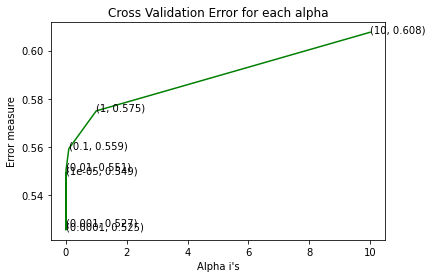

For values of best alpha =  0.0001 The train log loss is: 0.5236037895485864
For values of best alpha =  0.0001 The test log loss is: 0.52540469599021


In [ ]:
alpha=[10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    sgd=SGDClassifier(loss='log',alpha=i,penalty='l2',random_state=42)
    
    calibration=CalibratedClassifierCV(base_estimator=sgd,method='sigmoid')
    calibration.fit(X_train,y_train)
    
    predict_y=calibration.predict_proba(X_test)
    log_error_array.append(log_loss(y_test,predict_y))

fig,ax = plt.subplots()
ax.plot(alpha,log_error_array,c='g')
# annotating graph
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))

plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ',alpha[best_alpha],"The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ',alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

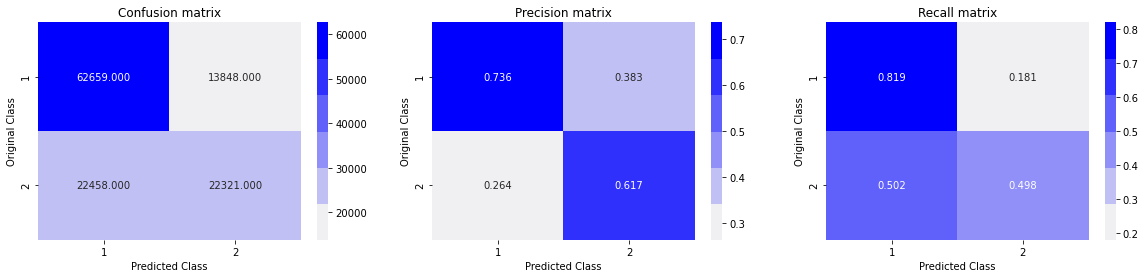

In [ ]:
pred_y=sig_clf.predict(X_test)
plot_confusion_matrix(y_test, pred_y)

###### From the recall matrix, its look like our model is not so good for classifying class 2 as there is only 0.498 recall score.

### Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.5368643497610922
For values of alpha =  0.0001 The log loss is: 0.5308476179710643
For values of alpha =  0.001 The log loss is: 0.5224825283036943
For values of alpha =  0.01 The log loss is: 0.5431817071755194
For values of alpha =  0.1 The log loss is: 0.5750024037577468
For values of alpha =  1 The log loss is: 0.630856669008138
For values of alpha =  10 The log loss is: 0.6465792488310489


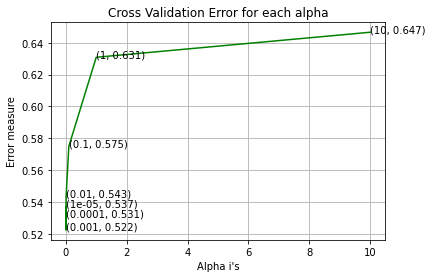

For values of best alpha =  0.001 The train log loss is: 0.5230614305763895
For values of best alpha =  0.001 The test log loss is: 0.5224825283036943


In [ ]:
alpha = [10 ** x for x in range(-5, 2)]

log_error_array=[]

for i in alpha:
    clf=SGDClassifier(alpha=i,penalty='l1',loss='hinge',random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

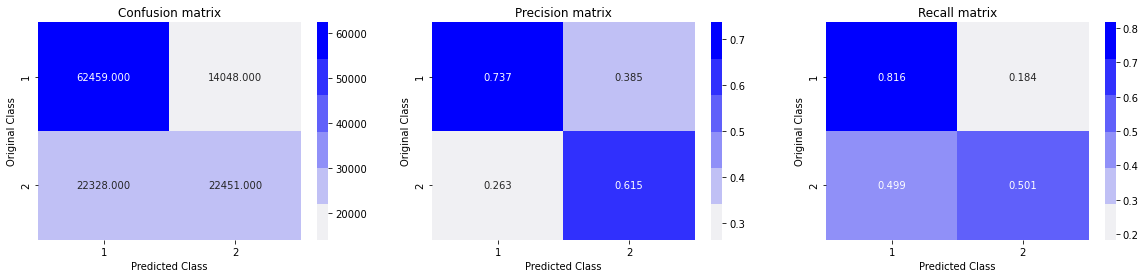

In [ ]:
pred_y=sig_clf.predict(X_test)
plot_confusion_matrix(y_test, pred_y)

### Gaussian Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
naive_clf=GaussianNB()
sig_clf=CalibratedClassifierCV(naive_clf,method='sigmoid')
sig_clf.fit(X_train,y_train)
predict_y = sig_clf.predict_proba(X_test)
log_error_array.append(log_loss(y_test, predict_y))
print("The log loss is:",log_loss(y_test, predict_y))

The log loss is: 0.5660898611615253


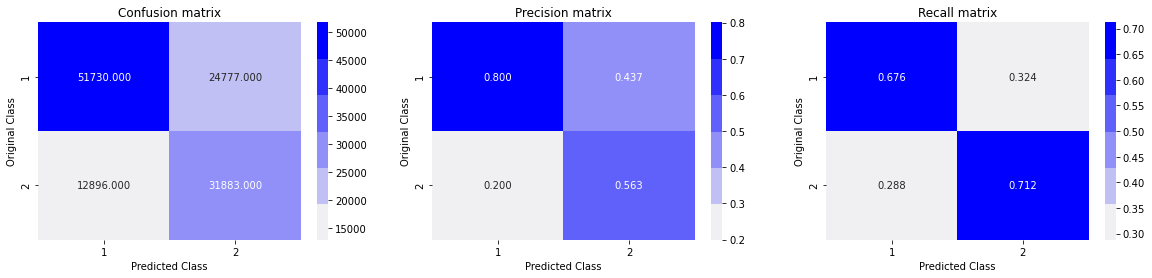

In [ ]:
pred_y=sig_clf.predict(X_test)
plot_confusion_matrix(y_test, pred_y)

###### Recall matrix for Gaussian NB is good as compared to logistic regression as recall for class 2= 0.712

### Extra Tree Classifier ( Modified Random Forest)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={'n_estimators':[100,200,300,400,500,700,800],
        'max_depth':[6,8,9,10,12,13,14,16],
        'min_samples_split':[2,4,6,8,10],
        'bootstrap':[True],
        'max_samples':[0.2,0.3,0.4,0.5,0.6,0.7]
}

In [ ]:
extra_tree_random=ExtraTreesClassifier()
extra_search_clf=RandomizedSearchCV(estimator=extra_tree_random, scoring='neg_log_loss',param_distributions=params,verbose=1)
extra_search_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 44.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=ExtraTreesClassifier(bootstrap=False,
                                                  ccp_alpha=0.0,
                                                  class_weight=None,
                                                  criterion='gini',
                                                  max_depth=None,
                                                  max_features='auto',
                                                  max_leaf_nodes=None,
                                                  max_samples=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                     

In [ ]:
extra_search_clf.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_samples': 0.3,
 'min_samples_split': 6,
 'n_estimators': 400}

#### Lets train Extra Tree Classifier with best parameters

In [ ]:
clf=ExtraTreesClassifier(bootstrap=True,max_depth=6,max_samples=0.3,min_samples_split=6,n_estimators=400)
clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=6, max_features='auto',
                     max_leaf_nodes=None, max_samples=0.3,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=6,
                     min_weight_fraction_leaf=0.0, n_estimators=400,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
predict_prob_y=clf.predict_proba(X_test)
print("Log loss for Extra Tress Classifier : ",log_loss(y_test,predict_prob_y))

Log loss for Extra Tress Classifier :  0.543563307893336


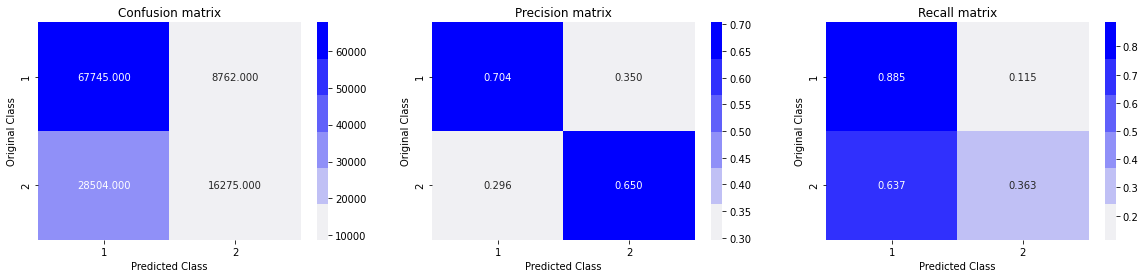

In [ ]:
predict_y=clf.predict(X_test)
plot_confusion_matrix(y_test,predict_y)

###### As we see from the confusion matrix that our model is very good for predicting class 1 but not very good for predicting class 2.

#### Top 10 Features

<BarContainer object of 10 artists>

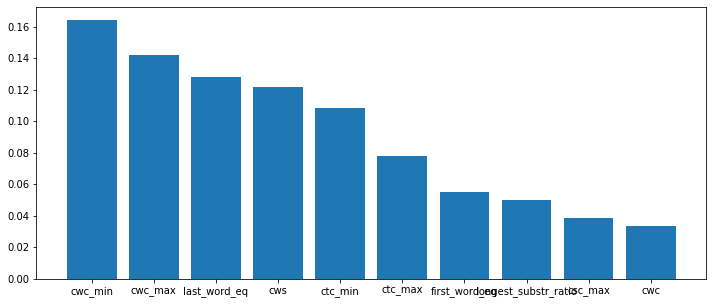

In [ ]:
importance=clf.feature_importances_
idx=np.argsort(-importance)[:10]
plt.figure(figsize=(12,5))
plt.bar(X_train.columns[idx],clf.feature_importances_[idx])

### XGBoost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV
from scipy.stats import uniform
import pickle

Estimators =  100 Train Log Loss  0.4477864182586398 Test Log Loss  0.44967301435866
Estimators =  150 Train Log Loss  0.44250785295794914 Test Log Loss  0.4450920177270206
Estimators =  200 Train Log Loss  0.4384728403478755 Test Log Loss  0.4419091849858656
Estimators =  300 Train Log Loss  0.4328413379651845 Test Log Loss  0.43819956553483824
Estimators =  400 Train Log Loss  0.42914169699108357 Test Log Loss  0.4366466120194177
Estimators =  600 Train Log Loss  0.42315322631608626 Test Log Loss  0.4349289529891354
Estimators =  800 Train Log Loss  0.4182222167338355 Test Log Loss  0.43385665408567736


Text(0, 0.5, 'Log Loss')

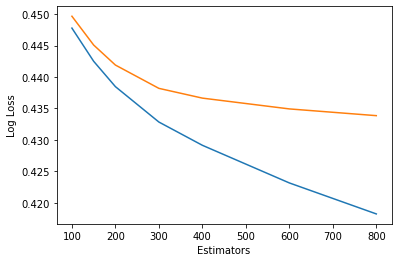

In [ ]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train,y_train)
    predict_y = clf.predict_proba(X_train)
    log_loss_train = log_loss(y_train, predict_y)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test)
    log_loss_test = log_loss(y_test, predict_y)
    test_scores.append(log_loss_test)
    print('Estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('Estimators')
plt.ylabel('Log Loss')

In [ ]:
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=800,n_jobs=-1)
clf.fit(X_train,y_train)
predict_y=clf.predict_proba(X_train)
log_loss_train = log_loss(y_train, predict_y)
predict_y = clf.predict_proba(X_test)
log_loss_test = log_loss(y_test, predict_y)
print('Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)

Train Log Loss  0.41749276560241877 Test Log Loss  0.43548239383355003


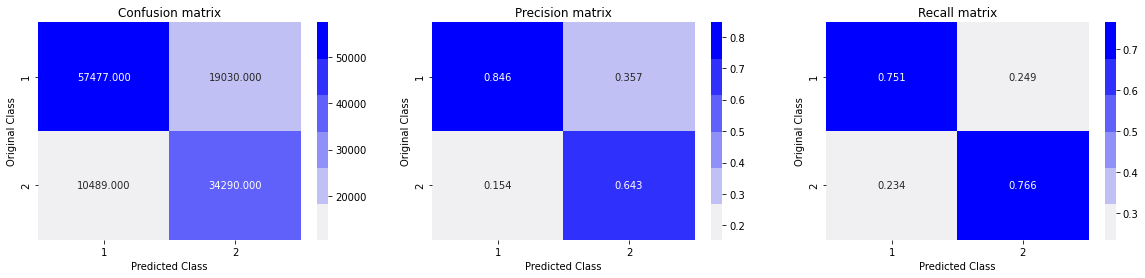

In [ ]:
predict_y=clf.predict(X_test)
plot_confusion_matrix(y_test,predict_y)

In [ ]:
# Saving the model for future use
pickle.dump(clf,open('model_xbg.p','wb'))